Когда вы еще учились в школе, то вас часто мучали написанием сочинений. Может быть даже кто-нибудь из вас увлекался написанием стихотворений, романов или прозы. А значит, в вас живет дух великого русского писателя. А вот интересно какого? В данной домашней работе мы это и выясним!

Чтобы узнать на какого писателя вы похожи необходимо выполнить следующее задание:

1. Скачать датасет с [писателями Русской литературы](https://storage.yandexcloud.net/academy.ai/russian_literature.zip). Каждый текст необходимо разбить на обучающую, проверочную и тестовую выборки, для этого модифицируйте функцию `seq_vectorize`, чтобы она возвращала все 3 выборки.
2. Используя материалы из ноутбука практического занятия [сравнение архитектур рекуррентных и одномерных сверточных сетей](https://colab.research.google.com/drive/15-SEqMwU3ALZmiEtlJFZllc38VTGHkGu), выберите лучший вариант нейронки и адаптируйте ее структуру.
3. Подгрузите веса Наташи как в уроке [20.3](https://colab.research.google.com/drive/1g_dX1XpRY--X6EjFflCC0717p9_9Y1SP) для слоя эмбендинга.
4. Заморозьте слой эмбединга.
5. Обучите модель на любом числе писателей (не менее 4-х) с балансировкой. Используйте обучающую выборку для обучения, а проверочную - в качестве валидационных данных (`validation_data`).
6. Постройте матрицу ошибок на тестовых образцах! В примерах мы строили на проверочных. Добейтесь средней точности более 70% на тестовых образцах. Получите 3 балла.
7. Если сможете добиться точности более 90% получите +1 балл.
8. Подготовьте свой текст и предложите нейронке предсказать на кого из русских писателей похож ваш текст. Вам необходимо построить круговую диаграмму с вероятностями предсказания моделью автора сочинения (по тестовой выборке). Если текст будет вашего авторства, то вы получите +1 балл. Если у вас плохо с фантазией, то возьмите небольшой фрагмент вашего любимого произведения любого автора, не представленного в датасете.

In [ ]:
from keras.models import Sequential
from keras.utils import get_file, to_categorical
from keras.layers import Embedding, Flatten, Dense, SpatialDropout1D, BatchNormalization, Dropout, SimpleRNN
from keras.layers import GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

from tensorflow.keras.preprocessing.text import Tokenizer

import os   # Модуль для работы с файловой системой

import glob # Вспомогательный модуль для работы с файловой системой
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Для работы с матрицей ошибок

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

--2024-09-04 16:27:09--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar’

navec_hudlit_v1_12B 100%[===================>]  50.56M  14.4MB/s    in 4.7s    

2024-09-04 16:27:15 (10.8 MB/s) - ‘navec_hudlit_v1_12B_500K_300d_100q.tar’ saved [53012480/53012480]



In [ ]:
!pip install navec

In [ ]:
from navec import Navec
navec = Navec.load('navec_hudlit_v1_12B_500K_300d_100q.tar')

In [ ]:
data_path = get_file(
    "russian_literature.zip",
    "https://storage.yandexcloud.net/academy.ai/russian_literature.zip"
)

21547079/21547079 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Разархивируем датасета во временную папку 'dataset'
!unzip -qo "{data_path}" -d ./dataset

error:  cannot create ./dataset/poems/Blok/╨б╤В╨╕╤Е╨╛╤В╨▓╨╛╤А╨╡╨╜╨╕╤П 1897-1903 ╨│╨│, ╨╜╨╡ ╨▓╨╛╤И╨╡╨┤╤И╨╕╨╡ ╨▓ ╨╛╤Б╨╜╨╛╨▓╨╜╨╛╨╡ ╤Б╨╛╨▒╤А╨░╨╜╨╕╨╡.txt
        File name too long
error:  cannot create ./dataset/prose/Gogol/╨Я╨╛╨▓╨╡╤Б╤В╤М ╨╛ ╤В╨╛╨╝, ╨║╨░╨║ ╨┐╨╛╤Б╤Б╨╛╤А╨╕╨╗╤Б╤П ╨Ш╨▓╨░╨╜ ╨Ш╨▓╨░╨╜╨╛╨▓╨╕╤З ╤Б ╨Ш╨▓╨░╨╜╨╛╨╝ ╨Э╨╕╨║╨╕╤Д╨╛╤А╨╛╨▓╨╕╤З╨╡╨╝.txt
        File name too long
error:  cannot create ./dataset/publicism/Tolstoy/╨Ф╨╛╨║╨╗╨░╨┤, ╨┐╤А╨╕╨│╨╛╤В╨╛╨▓╨╗╨╡╨╜╨╜╤Л╨╣ ╨┤╨╗╤П ╨║╨╛╨╜╨│╤А╨╡╤Б╤Б╨░ ╨╛ ╨╝╨╕╤А╨╡ ╨▓ ╨б╤В╨╛╨║╨│╨╛╨╗╤М╨╝╨╡.txt
        File name too long
error:  cannot create ./dataset/publicism/Tolstoy/╨Я╨╛╤З╨╡╨╝╤Г ╤Е╤А╨╕╤Б╤В╨╕╨░╨╜╤Б╨║╨╕╨╡ ╨╜╨░╤А╨╛╨┤╤Л ╨▓╨╛╨╛╨▒╤Й╨╡ ╨╕ ╨▓ ╨╛╤Б╨╛╨▒╨╡╨╜╨╜╨╛╤Б╤В╨╕ ╤А╤Г╤Б╤Б╨║╨╕╨╣ ╨╜╨░╤Е╨╛╨┤╤П╤В╤Б╤П ╤В╨╡╨┐╨╡╤А╤М ╨▓ ╨▒╨╡╨┤╤Б╤В╨▓╨╡╨╜╨╜╨╛╨╝ ╨┐╨╛╨╗╨╛╨╢╨╡╨╜╨╕╨╕.txt
        File name too long


In [ ]:
FILE_DIR_POEMS = './dataset/poems'
file_list_poems = os.listdir(FILE_DIR_POEMS)
print("Поэты:")
print(file_list_poems)

Поэты:
['Blok', 'Pushkin', 'Lermontov', 'Nekrasov']


In [ ]:
FILE_DIR_PROSE = './dataset/prose'
file_list_prose = os.listdir(FILE_DIR_PROSE)
print("Прозаики:")
print(file_list_prose)

Прозаики:
['Chekhov', 'Blok', 'Bryusov', 'Pushkin', 'Turgenev', 'Lermontov', 'Herzen', 'Gogol', 'Dostoevsky', 'Gorky', 'Tolstoy']


In [ ]:
FILE_DIR_PUBLICISM = './dataset/publicism'
file_list_publicism = os.listdir(FILE_DIR_PUBLICISM)
print("Публицисты:")
print(file_list_publicism)

Публицисты:
['Tolstoy']


In [ ]:
CLASS_LIST = list(set(file_list_poems + file_list_prose+file_list_publicism))
print("Общий список писателей:")
print(CLASS_LIST)

Общий список писателей:
['Turgenev', 'Chekhov', 'Blok', 'Bryusov', 'Herzen', 'Lermontov', 'Pushkin', 'Nekrasov', 'Dostoevsky', 'Gogol', 'Tolstoy', 'Gorky']


In [ ]:
# Загрузка необходимых библиотек
import glob # Вспомогательный модуль для работы с файловой системой


all_texts = {} # Собираем в словарь весь датасет

for author in CLASS_LIST:
    all_texts[author] = '' # Инициализируем пустой строкой новый ключ словаря
    for path in glob.glob('./dataset/prose/{}/*.txt'.format(author)) +  glob.glob('./dataset/poems/{}/*.txt'.format(author)): # Поиск файлов по шаблону
        with open(f'{path}', 'r', errors='ignore') as f: # игнорируем ошибки (например символы из другой кодировки)
            # Загрузка содержимого файла в строку
            text = f.read()

        all_texts[author]  += ' ' + text.replace('\n', ' ') # Заменяем символ перехода на новую строку пробелом

In [ ]:
embedding_dim = 300    # размерность векторов эмбединга (300d в имени эмбединга)
max_words = 15000      # Количество слов, рассматриваемых как признаки

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=max_words,
                      filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                      lower=True, split=' ', char_level=False)


# Построение частотного словаря по текстам
tokenizer.fit_on_texts(all_texts.values())

In [ ]:
seq_train = tokenizer.texts_to_sequences(all_texts.values())

In [ ]:
# используем генератор цикла для получения длины текстов по каждому автору
total = sum(len(i) for i in seq_train)
print(f'Датасет состоит из {total} слов')

print('Общая выборка по писателям (по словам):')
mean_list = np.array([])
for author in CLASS_LIST:
    cls = CLASS_LIST.index(author)
    print(f'{author} - {len(seq_train[cls])} слов, доля в общей базе: {len(seq_train[cls])/total*100 :.2f}%')
    mean_list = np.append(mean_list, len(seq_train[cls]))

print('Среднее значение слов: ', np.round(mean_list.mean()))
print('Медианное значение слов: ', np.median(mean_list))


median = int(np.median(mean_list)) # Зафиксировали медианное значение
CLASS_LIST_BALANCE = [] # Сбалансированный набор меток
seq_train_balance = []
for author in CLASS_LIST:
    cls = CLASS_LIST.index(author)
    if len(seq_train[cls]) > median * 0.6:
      seq_train_balance.append(seq_train[cls][:median])
      CLASS_LIST_BALANCE.append(author)

Датасет состоит из 4990033 слов
Общая выборка по писателям (по словам):
Turgenev - 305585 слов, доля в общей базе: 6.12%
Chekhov - 244749 слов, доля в общей базе: 4.90%
Blok - 65425 слов, доля в общей базе: 1.31%
Bryusov - 349207 слов, доля в общей базе: 7.00%
Herzen - 153335 слов, доля в общей базе: 3.07%
Lermontov - 46907 слов, доля в общей базе: 0.94%
Pushkin - 168322 слов, доля в общей базе: 3.37%
Nekrasov - 39226 слов, доля в общей базе: 0.79%
Dostoevsky - 1548697 слов, доля в общей базе: 31.04%
Gogol - 277499 слов, доля в общей базе: 5.56%
Tolstoy - 1237155 слов, доля в общей базе: 24.79%
Gorky - 553926 слов, доля в общей базе: 11.10%
Среднее значение слов:  415836.0
Медианное значение слов:  261124.0


In [ ]:
total = sum(len(i) for i in seq_train_balance)

print('Сбалансированная выборка по писателям (по словам):')
mean_list_balance = np.array([])
for author in CLASS_LIST_BALANCE[:5]:
    cls = CLASS_LIST_BALANCE[:5].index(author)
    print(f'{author} - {len(seq_train_balance[cls])} слов, доля в общей базе: {len(seq_train_balance[cls])/total*100 :.2f}%')
    mean_list_balance = np.append(mean_list_balance, len(seq_train_balance[cls]))

print('Среднее значение слов: ', np.round(mean_list_balance.mean()))
print('Медианное значение слов: ', np.median(mean_list_balance))

Сбалансированная выборка по писателям (по словам):
Turgenev - 261124 слов, доля в общей базе: 13.19%
Chekhov - 244749 слов, доля в общей базе: 12.36%
Bryusov - 261124 слов, доля в общей базе: 13.19%
Pushkin - 168322 слов, доля в общей базе: 8.50%
Dostoevsky - 261124 слов, доля в общей базе: 13.19%
Среднее значение слов:  239289.0
Медианное значение слов:  261124.0


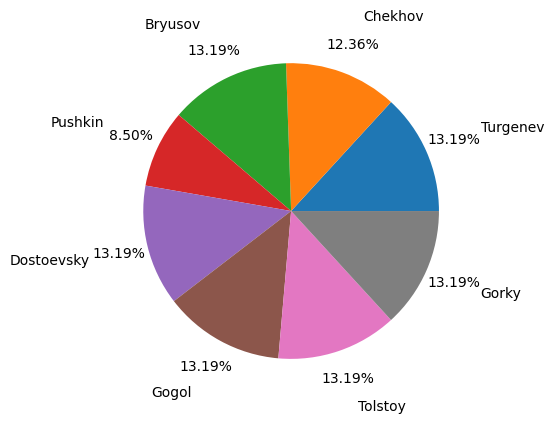

In [ ]:
fig, ax = plt.subplots()
ax.pie([len(i) for i in seq_train_balance],  # формируем список значений как длина символов текста каждого автора
       labels=CLASS_LIST_BALANCE,            # список меток
       pctdistance=1.2,                      # дистанция размещения % (1 - граница окружности)
       labeldistance=1.4,                    # размещение меток (1 - граница окружности)
       autopct='%1.2f%%'                     # формат для % (2 знака после запятой)
      )
plt.show()

In [ ]:
# используем генератор цикла для получения длины текстов по каждому автору
total = sum(len(i) for i in seq_train_balance)
print(f'Датасет состоит из {total} слов')

Датасет состоит из 1979815 слов


In [ ]:
print('Общая выборка по писателям (по словам):')
mean_list = np.array([])
for author in CLASS_LIST_BALANCE[:5]:
    cls = CLASS_LIST_BALANCE[:5].index(author)
    print(f'{author} - {len(seq_train_balance[cls])} слов, доля в общей базе: {len(seq_train_balance[cls])/total*100 :.2f}%')
    mean_list = np.append(mean_list, len(seq_train_balance[cls]))

print('Среднее значение слов: ', np.round(mean_list.mean()))
print('Медианное значение слов: ', np.median(mean_list))

Общая выборка по писателям (по словам):
Turgenev - 261124 слов, доля в общей базе: 13.19%
Chekhov - 244749 слов, доля в общей базе: 12.36%
Bryusov - 261124 слов, доля в общей базе: 13.19%
Pushkin - 168322 слов, доля в общей базе: 8.50%
Dostoevsky - 261124 слов, доля в общей базе: 13.19%
Среднее значение слов:  239289.0
Медианное значение слов:  261124.0


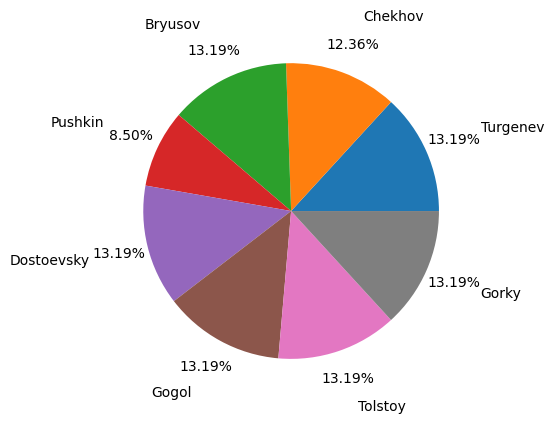

In [ ]:
fig, ax = plt.subplots()
ax.pie([len(i) for i in seq_train_balance], # формируем список значений как длина символов текста каждого автора
       labels=CLASS_LIST_BALANCE,                    # список меток
       pctdistance=1.2,                      # дистанция размещения % (1 - граница окружности)
       labeldistance=1.4,                    # размещение меток (1 - граница окружности)
       autopct='%1.2f%%'                     # формат для % (2 знака после запятой)
      )
plt.show()

In [ ]:
WIN_SIZE = 1000   # Ширина окна в токенах
WIN_STEP = 100    # Шаг окна в токенах

# Функция разбиения последовательности на отрезки скользящим окном
# Последовательность разбивается на части до последнего полного окна
# Параметры:
# sequence - последовательность токенов
# win_size - размер окна
# step - шаг окна
def seq_split(sequence, win_size, step):
    # Делим строку на отрезки с помощью генератора цикла
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, step)]

def seq_vectorize(
    seq_list,   # Последовательность
    train_split,# Доля на обучающую выборку
    val_split,  # Доля на проверочную выборкуу
    # test_split, # Доля на тестовую выборку
    class_list, # Список классов
    win_size,   # Ширина скользящего окна
    step        # Шаг скользящего окна
):
 # Проверяем, что сумма долей не превышает 100%
    assert train_split + val_split <= 1, "Сумма долей должна быть меньше или равна 1"

    # Списки для результирующих данных
    x_train, y_train, x_val, y_val, x_test, y_test = [], [], [], [], [], []

    # Пробежимся по всем классам:
    for class_item in class_list:
        # Получим индекс класса
        cls = class_list.index(class_item)

        # Пороговые значения индексов для разбивки на обучающую, валидационную и тестовую выборки
        gate_train = int(len(seq_list[cls]) * train_split)
        gate_val = int(len(seq_list[cls]) * (train_split + val_split))

        # Разбиваем последовательность токенов класса на отрезки
        vectors_train = seq_split(seq_list[cls][:gate_train], win_size, step) # последовательность до порога попадет в обучающую выборку
        vectors_val = seq_split(seq_list[cls][gate_train:gate_val], win_size, step)  # последовательность после порога попадет в валидационную выборку
        vectors_test = seq_split(seq_list[cls][gate_val:], win_size, step)  # последовательность после второго порога попадет в тестовую выборку

        # Добавляем отрезки в соответствующие выборки
        x_train += vectors_train
        x_val += vectors_val
        x_test += vectors_test

        # Для всех отрезков класса добавляем метки класса в виде one-hot-encoding
        y_train += [to_categorical(cls, len(class_list))] * len(vectors_train)
        y_val += [to_categorical(cls, len(class_list))] * len(vectors_val)
        y_test += [to_categorical(cls, len(class_list))] * len(vectors_test)

    # Возвращаем результаты как numpy-массивы
    return (
        np.array(x_train), np.array(y_train),
        np.array(x_val), np.array(y_val),
        np.array(x_test), np.array(y_test)
    )


In [ ]:
# Определяем доли
TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.1

x_train, y_train, x_val, y_val, x_test, y_test = seq_vectorize(
    seq_train_balance,
    TRAIN_SPLIT,
    VAL_SPLIT,
    CLASS_LIST_BALANCE[:5],
    WIN_SIZE,
    WIN_STEP
)

print(f'Форма входных данных для обучающей выборки: {x_train.shape}')
print(f'Форма выходных данных (меток) для обучающей выборки: {y_train.shape}')
print(f'Форма входных данных для валидационной выборки: {x_val.shape}')
print(f'Форма выходных данных (меток) для валидационной выборки: {y_val.shape}')
print(f'Форма входных данных для тестовой выборки: {x_test.shape}')
print(f'Форма выходных данных (меток) для тестовой выборки: {y_test.shape}')


Форма входных данных для обучающей выборки: (9522, 1000)
Форма выходных данных (меток) для обучающей выборки: (9522, 5)
Форма входных данных для валидационной выборки: (1150, 1000)
Форма выходных данных (меток) для валидационной выборки: (1150, 5)
Форма входных данных для тестовой выборки: (1150, 1000)
Форма выходных данных (меток) для тестовой выборки: (1150, 5)


In [ ]:
# Вывод графиков точности и ошибки
def show_plot(history, title=''):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
    fig.suptitle('График процесса обучения модели: '+title)
    ax1.plot(history.history['accuracy'],
               label='График точности на обучающей выборке')
    ax1.plot(history.history['val_accuracy'],
               label='График точности на проверочной выборке')
    ax1.xaxis.get_major_locator().set_params(integer=True) # На оси х показываем целые числа
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('График точности')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающей выборке')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочной выборке')
    ax2.xaxis.get_major_locator().set_params(integer=True) # На оси х показываем целые числа
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# # Функция вывода предсказанных значений
# def show_confusion_matrix(y_true, y_pred, class_labels):
#     # Матрица ошибок
#     cm = confusion_matrix(np.argmax(y_true, axis=1),
#                           np.argmax(y_pred, axis=1),
#                           normalize='true')
#     # Округление значений матрицы ошибок
#     cm = np.around(cm, 3)

#     # Отрисовка матрицы ошибок
#     fig, ax = plt.subplots(figsize=(10, 10))
#     ax.set_title(f'Матрица ошибок', fontsize=18)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
#     disp.plot(ax=ax)
#     plt.gca().images[-1].colorbar.remove()  # Убираем ненужную цветовую шкалу
#     plt.xlabel('Предсказанные классы', fontsize=16)
#     plt.ylabel('Верные классы', fontsize=16)
#     fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси
#     plt.show()
def show_confusion_matrix(y_true, y_pred, class_labels, test_indices):
    # Выбираем только тестовые образцы
    y_true_test = y_true[test_indices]
    y_pred_test = y_pred[test_indices]

    # Матрица ошибок
    cm = confusion_matrix(np.argmax(y_true_test, axis=1),
                          np.argmax(y_pred_test, axis=1),
                          normalize='true')

    # Округление значений матрицы ошибок
    cm = np.around(cm, 3)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(f'Матрица ошибок на тестовых образцах', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Убираем ненужную цветовую шкалу
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси

    # Добавляем информацию о количестве тестовых образцов
    num_test_samples = len(test_indices)
    ax.text(0.05, 0.95, f'Количество тестовых образцов: {num_test_samples}',
            transform=ax.transAxes, verticalalignment='top', fontsize=14)

    plt.show()

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))

In [ ]:
model_MIX = Sequential()
model_MIX.add(Embedding(max_words, embedding_dim, input_length=WIN_SIZE))
model_MIX.add(SpatialDropout1D(0.3))
model_MIX.add(BatchNormalization())

# Два двунаправленных рекуррентных слоя LSTM
model_MIX.add(Bidirectional(LSTM(8, return_sequences=True)))
model_MIX.add(Bidirectional(LSTM(8, return_sequences=True)))
model_MIX.add(Dropout(0.3))
model_MIX.add(BatchNormalization())

# Два рекуррентных слоя GRU
model_MIX.add(GRU(16, return_sequences=True, reset_after=True))
model_MIX.add(GRU(16, reset_after=True))
model_MIX.add(Dropout(0.3))
model_MIX.add(BatchNormalization())

# Дополнительный полносвязный слой
model_MIX.add(Dense(100, activation='relu'))
model_MIX.add(Dropout(0.3))
model_MIX.add(BatchNormalization())
model_MIX.add(Dense(len(CLASS_LIST_BALANCE[:5]), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
def loadEmbedding(model):
    word_index = tokenizer.word_index
    embeddings_index = navec

    embedding_matrix = np.zeros((max_words, embedding_dim))
    for word, i in word_index.items():
        if i < max_words:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

    model.layers[0].set_weights([embedding_matrix])
    model.layers[0].trainable = False
    return model

In [ ]:
model_MIX = loadEmbedding(model_MIX)

ValueError: You called `set_weights(weights)` on layer 'embedding' with a weight list of length 1, but the layer was expecting 0 weights.

In [ ]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("classes:", len(CLASS_LIST))

x_train: (9522, 1000)
y_train: (9522, 5)
classes: 12


In [ ]:
import keras
model_MIX.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath = 'model.keras',
                             monitor = 'val_accuracy',
                             save_best_only = True,
                             mode = 'max',
                             verbose = 0)
]


history_mix = model_MIX.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val), callbacks=callbacks)

Epoch 1/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 72s 191ms/step - accuracy: 0.2228 - loss: 1.9337 - val_accuracy: 0.3087 - val_loss: 1.5511
Epoch 2/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 67s 163ms/step - accuracy: 0.4046 - loss: 1.4433 - val_accuracy: 0.4122 - val_loss: 2.1520
Epoch 3/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 82s 163ms/step - accuracy: 0.6823 - loss: 0.8738 - val_accuracy: 0.6035 - val_loss: 1.2153
Epoch 4/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 81s 160ms/step - accuracy: 0.8107 - loss: 0.5788 - val_accuracy: 0.7113 - val_loss: 0.9590
Epoch 5/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 83s 162ms/step - accuracy: 0.9366 - loss: 0.2260 - val_accuracy: 0.7435 - val_loss: 0.8675
Epoch 6/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 48s 162ms/step - accuracy: 0.9650 - loss: 0.1413 - val_accuracy: 0.6957 - val_loss: 1.1261
Epoch 7/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 82s 161ms/step - accuracy: 0.9769 - loss: 0.0936 - val_accuracy: 0.8296 - val_loss: 0.6588
Epoch 8/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 82s 163ms/step - accuracy: 0.9887 - loss: 0

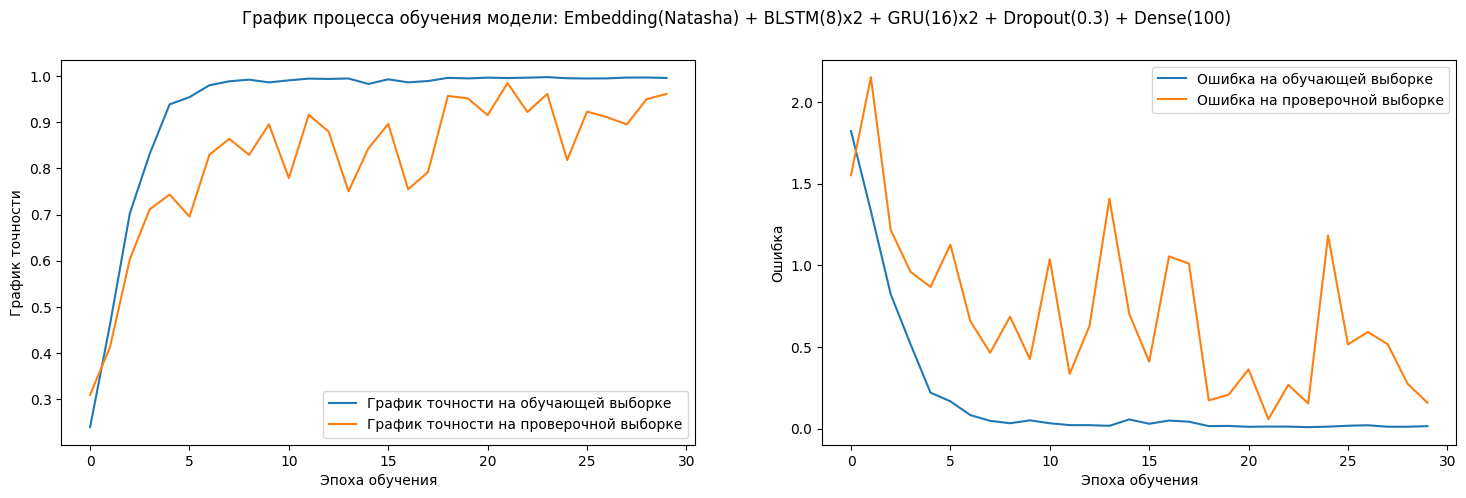

In [ ]:
show_plot(history_mix, 'Embedding(Natasha) + BLSTM(8)x2 + GRU(16)x2 + Dropout(0.3) + Dense(100)')

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step


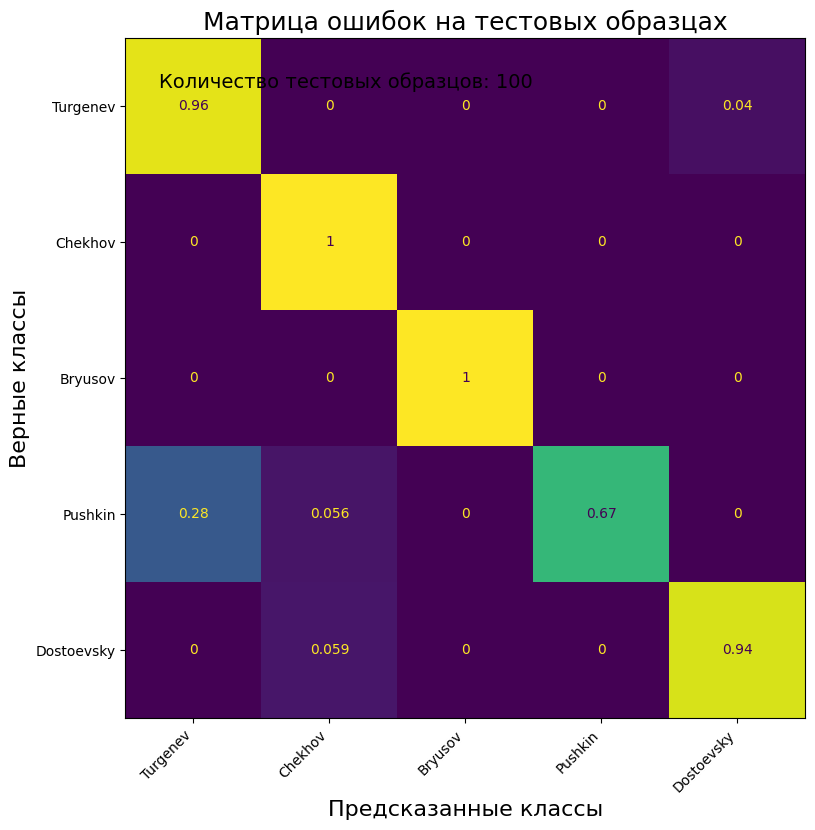


Средняя точность распознавания:  91%


In [ ]:
test_indices = np.random.choice(len(y_test), size=100)
y_pred_mix = model_MIX.predict(x_test)
show_confusion_matrix(y_test, y_pred_mix, CLASS_LIST_BALANCE[:5], test_indices)

In [ ]:
from keras.preprocessing.sequence import pad_sequences
text_to_predict = """Он указал, что любой, кто входит в контакт с ребенком, является учителем, который непрерывно описывает ему мир, вплоть до того момента, пока ребенок не будет способен воспринимать мир так, как он описан. Согласно дону Хуану мы не сохраняем памяти этого поворотного момента просто потому, что, пожалуй, никто из нас не имел никакой точки соотнесения для того, чтобы сравнить его с чем-либо еще. Однако, с этого момента и дальше ребенок становится членом. Он знает описание мира и его членство становится полноправным, я полагаю, когда он становится способным делать все должные интерпретации восприятия, которые, подтверждая это описание, делают его достоверным.

Для дона Хуана в таком случае, реальность нашей повседневной жизни состоит из бесконечного потока интерпретаций восприятия, которым мы, т.е. индивидуумы, которые разделяют особое членство, научились делать одинаково.

Ты идея, что интерпретации восприятия, которые делают мир, имеют недостаток, соответствует тому факту, что они текут непрерывно и редко, если вообще когда-либо, ставятся под вопрос. Фактически, реальность мира, который мы знаем, считается настолько сама собой разумеющейся, что основной момент магии состоящий в том, что наша реальность является просто одним из многих описаний, едва ли может быть принят, как серьезное заключение.

К счастью, в случае моего ученичества, дона Хуана совершенно не заботило, могу я или нет понимать то, что он говорит. Таким образом, как учитель магии, дон Хуан взялся описывать мне мир со времени нашего первого разговора. Моя трудность в понимании его концепции и методов проистекала из того факта, что его описание было чуждым и несовпадающим с моим собственным описанием.

Его утверждением было то, что он учит меня, как «видеть», в противоположность просто «смотрению», и что «остановка мира» была первым шагом к «видению».

В течение многих лет я рассматривал идею «останавливания мира», как загадочную метафору, которая на самом деле ничего не значит. И только лишь во время неофициального разговора, который имел место к концу моего ученичества, я полностью понял ее объем и важность, как одного из основных моментов в знании дона Хуана.
Дон Хуан и я разговаривали о различных вещах в свободной и непринужденной манере. Я рассказал ему о моем друге и его проблеме со своим девятилетним сыном. Ребенок, который жил с матерью в течение последних четырех лет, и теперь жил с моим другом, и проблема состояла в том, что с ним делать. Согласно моему другу, ребенок был негоден для школы. У него не хватало концентрации, и он ничем не интересовался. Он всему оказывал сопротивление, против любого контакта восстает и убегает из дома."""



In [ ]:
# Токенизация текста
text_to_predict_tokens = tokenizer.texts_to_sequences([text_to_predict])[0]
print(f"Токенизированный текст: {text_to_predict_tokens}")


Токенизированный текст: [8, 2295, 4, 93, 2198, 2, 7, 2429, 3005, 8467, 116, 7767, 36, 668, 3635, 49, 66, 347, 973, 3, 95, 3323, 668, 18, 9, 8, 7813, 44, 3, 1386, 88, 255, 84, 4, 635, 270, 26, 97, 3, 545, 1147, 2430, 43, 66, 68, 12, 7, 67, 1206, 37, 218, 7, 88, 1, 631, 973, 1613, 7987, 8, 245, 8067, 1008, 1, 12, 1613, 5, 2785, 38, 8, 1613, 14568, 269, 17, 129, 14, 8067, 1628, 12, 43, 5167, 2, 694, 487, 572, 139, 2594, 26, 425, 44, 500, 988, 129, 8784, 269, 2638, 31, 1916, 4, 129, 1628, 668, 2500, 7442, 207, 4, 46, 12803, 7767, 1, 1177, 57, 505, 38, 1206, 77, 411, 1008, 116, 44, 1987, 10161, 3624, 236, 310, 4, 3072, 14493, 2, 107, 4, 778, 3005, 255, 408, 26, 1297, 420, 53, 63, 50, 9207, 9, 4647, 4169, 15, 5146, 2, 487, 339, 5167, 184, 3, 199, 5, 56, 48, 1346, 10, 4, 8, 161, 306, 418, 9, 1694, 14493, 1946, 3397, 5077, 22, 668, 76, 329, 531, 729, 1466, 206, 2, 12, 1, 26, 66, 8415, 4, 12, 8067, 25, 1, 7, 755, 6461, 12, 25, 10, 4, 8, 8507, 24, 9, 368, 2, 11560, 255, 1, 4, 1008, 55, 1928, 212

In [ ]:
text_vector = model_MIX.predict(np.array([tokenizer.texts_to_sequences([text_to_predict])[0]]))
probabilities = [f"{prob*100:.2f}" for prob in np.array(text_vector)[0]]
max_index = np.argmax(probabilities)
print(f"Предсказанный автор: {CLASS_LIST_BALANCE[:5][max_index]}, c вероятностью: {probabilities[max_index]}%")

print("Вероятности для каждого автора:")
for author, prob in zip(CLASS_LIST_BALANCE[:5], probabilities):
    print(f"{author}: {prob}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
Предсказанный автор: Bryusov, c вероятностью: 94.23%
Вероятности для каждого автора:
Turgenev: 0.18%
Chekhov: 1.01%
Bryusov: 94.23%
Pushkin: 1.93%
Dostoevsky: 2.65%


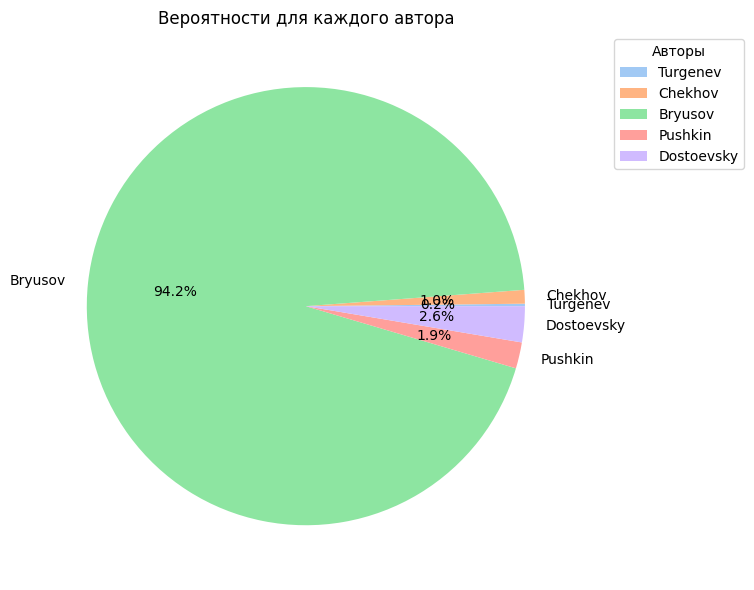

Предсказанный автор: Bryusov, с вероятностью: 94.23%
Вероятности для каждого автора:
Turgenev: 0.18%
Chekhov: 1.01%
Bryusov: 94.23%
Pushkin: 1.93%
Dostoevsky: 2.65%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Создаем круговую диаграмму
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel', n_colors=len(probabilities))
plt.pie(probabilities, labels=CLASS_LIST_BALANCE[:5], colors=colors, autopct='%1.1f%%')

# Настройка заголовка и легенды
plt.title('Вероятности для каждого автора')
plt.legend(title="Авторы", bbox_to_anchor=(1.05, 1), loc='upper left')

# Отображение графика
plt.tight_layout()
plt.show()

# Выводим информацию об авторе с самой высокой вероятностью
print(f"Предсказанный автор: {CLASS_LIST_BALANCE[max_index]}, с вероятностью: {probabilities[max_index]}%")

# Выводим вероятности для каждого автора
print("Вероятности для каждого автора:")
for author, prob in zip(CLASS_LIST_BALANCE, probabilities):
    print(f"{author}: {prob}%")